# Lyft Bike Rentals from October 2019
## by Emily Brown

## Table of Contents
<ul>
<li><a href="#intro">Preliminary Wrangling</a></li>
<li><a href="#gather">Clean and Tidy</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Preliminary Wrangling

> This data is from the Lyft website about their rental bikes in September 2019 in the San Fransico Bay Area.  It was uploaded on Oct 11th 2019, at 02:40:06 pm to the Lyft website.  This data is provided according to the Bay Wheels License Agreement.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
bikes = pd.read_csv('201909-baywheels-tripdata.csv', sep=',')
bikes.head()

duration_sec                start_time                  end_time  \
0         60863  2019-09-30 11:48:02.7100  2019-10-01 04:42:25.8640   
1         36019  2019-09-30 16:16:32.3530  2019-10-01 02:16:51.9820   
2          5615  2019-09-30 23:12:25.9980  2019-10-01 00:46:01.9590   
3          1482  2019-09-30 23:57:34.6630  2019-10-01 00:22:16.8490   
4          1272  2019-09-30 23:53:28.6530  2019-10-01 00:14:41.0740   

   start_station_id                                 start_station_name  \
0               465  San Francisco Caltrain Station (King St at 4th...   
1               294                            Pierce Ave at Market St   
2               370                                Jones St at Post St   
3               109                             17th St at Valencia St   
4                95                              Sanchez St at 15th St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776329              -122.394438             465   
1               37.327581              -121.884559             443   
2               37.787327              -122.413278               4   
3               37.763316              -122.421904             460   
4               37.766219              -122.431060             127   

                                    end_station_name  end_station_latitude  \
0  San Francisco Caltrain Station (King St at 4th...             37.776329   
1                                 3rd St at Keyes St             37.320866   
2                        Cyril Magnin St at Ellis St             37.785881   
3                Terry Francois Blvd at Warriors Way             37.769095   
4                             Valencia St at 21st St             37.756708   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.394438    12904    Customer             1990.0   
1            -121.876279      163    Customer                NaN   
2            -122.408915    10737    Customer             1985.0   
3            -122.386333    10346    Customer                NaN   
4            -122.421025     1349  Subscriber             1989.0   

  member_gender bike_share_for_all_trip  
0        Female                      No  
1           NaN                      No  
2          Male                      No  
3           NaN                      No  
4          Male                      No

In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217986 entries, 0 to 217985
Data columns (total 16 columns):
duration_sec               217986 non-null int64
start_time                 217986 non-null object
end_time                   217986 non-null object
start_station_id           217986 non-null int64
start_station_name         217986 non-null object
start_station_latitude     217986 non-null float64
start_station_longitude    217986 non-null float64
end_station_id             217986 non-null int64
end_station_name           217986 non-null object
end_station_latitude       217986 non-null float64
end_station_longitude      217986 non-null float64
bike_id                    217986 non-null int64
user_type                  217986 non-null object
member_birth_year          170999 non-null float64
member_gender              170999 non-null object
bike_share_for_all_trip    217986 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 26.6+ MB


In [4]:
bikes.describe()

duration_sec  start_station_id  start_station_latitude  \
count  217986.000000     217986.000000           217986.000000   
mean      844.360340        155.828108               37.766839   
std      1929.005266        128.100878                0.105999   
min        61.000000          3.000000               37.311284   
25%       381.000000         50.000000               37.769218   
50%       602.000000        114.000000               37.780526   
75%       932.000000        250.000000               37.796389   
max     86114.000000        470.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            217986.000000   217986.000000         217986.000000   
mean               -122.351045      150.034410             37.767041   
std                   0.123472      126.852447              0.105875   
min                -122.465007        3.000000             37.311284   
25%                -122.413278       42.000000             37.770030   
50%                -122.398279      108.000000             37.780526   
75%                -122.290230      245.000000             37.797280   
max                -121.870099      470.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          217986.000000  217986.000000      170999.000000  
mean             -122.350124    7219.087955        1985.085053  
std                 0.122580    4429.469296          10.155251  
min              -122.465007      12.000000        1890.000000  
25%              -122.411403    2381.000000        1980.000000  
50%              -122.397437    9758.000000        1988.000000  
75%              -122.291376   10609.000000        1992.000000  
max              -121.870099   13007.000000        2001.000000

In [5]:
#check for any duplicates
sum(bikes.duplicated())

0

### What is the structure of your dataset?

This data set has 217,986 bike rentals with 16 columns.  It contains 16 features: trip duration(seconds), start time, end time, start station id, start station latitude, start station longitude, end station id, end station latitude, end station longitude, bike id, user type, member birth year, member gender, and bike share for all trip.  Most variables are numerical, except for start time, end time, station names, user type, member gender, and bike share for all trip which are categorical. 


### What is/are the main feature(s) of interest in your dataset?

I'm going to mainly focus on time, age, gender, starting station id, and ending station id.  What is the average duration that a bike is rented?  Do more people under the age of 20 rent more bikes or the 20-35 age range?  For the longest duration bike rides, what location were they first rented?  Who rents more men or women? 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The duration_sec, start_time, and end_time columns will provide the duration that the bike was used.  I can also look at the member_birth_year column to figure out the age of the customer.  Then, I can divide the ages into groups to see which ages rents more bikes.  I can look at the start station ids and ending station ids to see which locations are the most popular.

<a id='gather'></a>
## Clean and Tidy Data

> I saw quite a few things that needed to be cleaned and tidied in this data before exploriing it more.

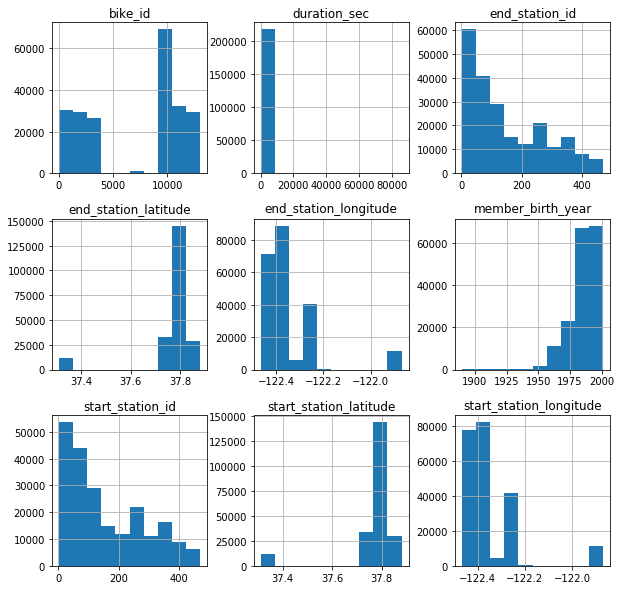

In [6]:
bikes.hist(figsize=(10,10));

It looks like station ids lower than 200 are very popular.  Maybe they are closer to the city?.  The end station id chart looks very similar to start station id.   I also notice a large amount of younger people renting the bikes.

In [7]:
#Change start time and end time to datetime
from datetime import datetime
#https://stackoverflow.com/questions/38333954/converting-object-to-datetime-format-in-python
bikes['start_time'] = pd.to_datetime(bikes['start_time'])
bikes['end_time'] = pd.to_datetime(bikes['end_time'])

In [8]:
bikes.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [9]:
bikes['duration_sec'].mean()

844.3603396548402

I'm not sure why this column is in seconds.  The mean is equal to about 14 minutes.  I will convert this so it's easier for people to relate to when it comes to riding a bike.

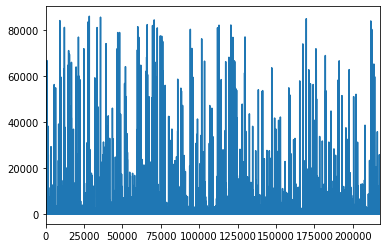

In [10]:
bikes['duration_sec'].plot();

In [11]:
from datetime import timedelta

time_diffs = bikes['end_time'] - bikes['start_time']
bikes['duration_min'] = time_diffs / timedelta(minutes=1)

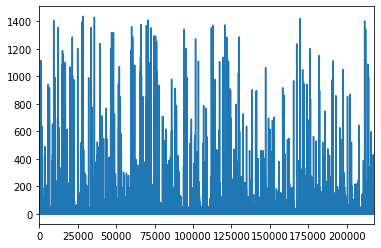

In [12]:
bikes['duration_min'].plot();

In [13]:
bikes['duration_min'].mean()

14.080999040152504

In [14]:
bikes.sample(2)

duration_sec              start_time                end_time  \
78401          1703 2019-09-20 09:11:36.250 2019-09-20 09:39:59.266   
12718          1159 2019-09-28 22:59:23.624 2019-09-28 23:18:43.458   

       start_station_id                   start_station_name  \
78401                73               Pierce St at Haight St   
12718               460  Terry Francois Blvd at Warriors Way   

       start_station_latitude  start_station_longitude  end_station_id  \
78401               37.771793              -122.433708              27   
12718               37.769095              -122.386333             284   

                                        end_station_name  \
78401                            Beale St at Harrison St   
12718  Yerba Buena Center for the Arts (Howard St at ...   

       end_station_latitude  end_station_longitude  bike_id user_type  \
78401             37.788059            -122.391865    12520  Customer   
12718             37.784872            -122.400876    10160  Customer   

       member_birth_year member_gender bike_share_for_all_trip  duration_min  
78401                NaN           NaN                      No     28.383600  
12718                NaN           NaN                      No     19.330567

In [15]:
bikes[bikes['member_birth_year']>=1900].shape

(170980, 17)

Some users have signed up with invalid birth dates.  If someone from 1900 or before is still alive they would be 119+ years old.  This data needs to be cleaned.  I will anyone over 100 years old.

In [16]:
bikes[bikes['member_birth_year']>=1919].shape

(170936, 17)

In [17]:
#Keep only those records with birthdates 1919 and after.  This will also get rid of the rows that had null for age.
bikes=bikes[bikes['member_birth_year']>=1919]

In [18]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170936 entries, 0 to 217985
Data columns (total 17 columns):
duration_sec               170936 non-null int64
start_time                 170936 non-null datetime64[ns]
end_time                   170936 non-null datetime64[ns]
start_station_id           170936 non-null int64
start_station_name         170936 non-null object
start_station_latitude     170936 non-null float64
start_station_longitude    170936 non-null float64
end_station_id             170936 non-null int64
end_station_name           170936 non-null object
end_station_latitude       170936 non-null float64
end_station_longitude      170936 non-null float64
bike_id                    170936 non-null int64
user_type                  170936 non-null object
member_birth_year          170936 non-null float64
member_gender              170936 non-null object
bike_share_for_all_trip    170936 non-null object
duration_min               170936 non-null float64
dtypes: datetime64[ns

In [19]:
bikes.sample(3)

duration_sec              start_time                end_time  \
178714           225 2019-09-06 18:26:00.626 2019-09-06 18:29:45.751   
66458            252 2019-09-22 09:06:36.177 2019-09-22 09:10:48.369   
60995            313 2019-09-23 08:10:47.183 2019-09-23 08:16:00.830   

        start_station_id    start_station_name  start_station_latitude  \
178714               349  Howard St at Mary St               37.781010   
66458                419    Fern St at Polk St               37.788197   
60995                169          Bushrod Park               37.846516   

        start_station_longitude  end_station_id       end_station_name  \
178714              -122.405666              61    Howard St at 8th St   
66458               -122.420373             384  Jackson St at Polk St   
60995               -122.265304             241     Ashby BART Station   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
178714             37.776513            -122.411306     3462  Subscriber   
66458              37.794160            -122.421568    10226  Subscriber   
60995              37.852477            -122.270213      985  Subscriber   

        member_birth_year member_gender bike_share_for_all_trip  duration_min  
178714             1989.0        Female                      No      3.752083  
66458              1979.0          Male                      No      4.203200  
60995              1993.0          Male                      No      5.227450

In [20]:
bikes['user_type'].value_counts()

Subscriber    162905
Customer        8031
Name: user_type, dtype: int64

In [21]:
bikes['member_gender'].value_counts()

Male      128462
Female     39875
Other       2599
Name: member_gender, dtype: int64

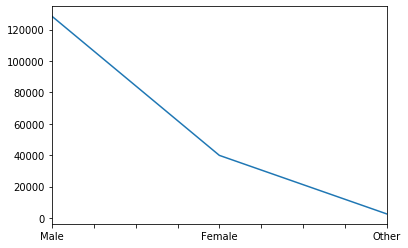

In [22]:
bikes['member_gender'].value_counts().plot();

Males are the majority of bike renters compared to females in this data set.

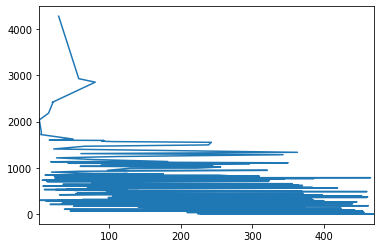

In [23]:
bikes['start_station_id'].value_counts().plot();

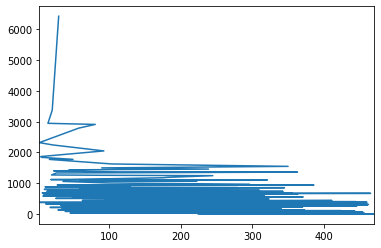

In [24]:
bikes['end_station_id'].value_counts().plot();

The lower numbered station ids seemed to be used alot more than the higher ones!

In [25]:
bikes.shape

(170936, 17)

In [26]:
bikes.sample(2)

duration_sec              start_time                end_time  \
198128           148 2019-09-04 15:08:04.131 2019-09-04 15:10:32.472   
24864            308 2019-09-27 06:44:34.150 2019-09-27 06:49:43.146   

        start_station_id             start_station_name  \
198128                23  The Embarcadero at Steuart St   
24864                196        Grand Ave at Perkins St   

        start_station_latitude  start_station_longitude  end_station_id  \
198128               37.791464              -122.391034              15   
24864                37.808894              -122.256460             182   

                                         end_station_name  \
198128  San Francisco Ferry Building (Harry Bridges Pl...   
24864                            19th Street BART Station   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
198128             37.795392            -122.394203    10079  Subscriber   
24864              37.809013            -122.268247    12837  Subscriber   

        member_birth_year member_gender bike_share_for_all_trip  duration_min  
198128             1976.0          Male                      No      2.472350  
24864              1990.0        Female                      No      5.149933

<a id='univariate'></a>
## Univariate Exploration


In [27]:
bikes.describe()

duration_sec  start_station_id  start_station_latitude  \
count  170936.000000     170936.000000           170936.000000   
mean      713.583025        154.322518               37.764745   
std      1402.595304        124.936048                0.111086   
min        61.000000          3.000000               37.311284   
25%       358.000000         50.000000               37.769218   
50%       560.000000        114.000000               37.780450   
75%       851.000000        247.000000               37.797280   
max     85035.000000        470.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            170936.000000   170936.000000         170936.000000   
mean               -122.346333      146.981244             37.764873   
std                   0.128187      122.894424              0.110915   
min                -122.465007        3.000000             37.311284   
25%                -122.411901       41.000000             37.769305   
50%                -122.397437      107.000000             37.780526   
75%                -122.279720      243.000000             37.797280   
max                -121.870099      470.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year   duration_min  
count          170936.000000  170936.000000      170936.000000  170936.000000  
mean             -122.345277    7287.014350        1985.117371      11.901371  
std                 0.127178    4404.491237          10.016227      23.376592  
min              -122.465007      12.000000        1920.000000       1.017000  
25%              -122.409851    2446.000000        1980.000000       5.968333  
50%              -122.395526    9777.000000        1988.000000       9.349433  
75%              -122.283093   10636.000000        1992.000000      14.186554  
max              -121.870099   13007.000000        2001.000000    1417.258850

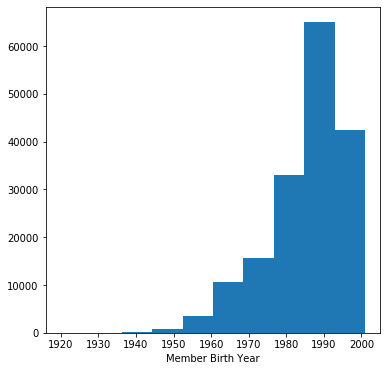

In [28]:
#standard-scaled plot
binsize = 5
bins = np.arange(1930, bikes['member_birth_year'].max()+binsize, 2010)

plt.figure(figsize=[6, 6])
plt.hist(data = bikes, x = 'member_birth_year')
plt.xlabel('Member Birth Year')
plt.show()

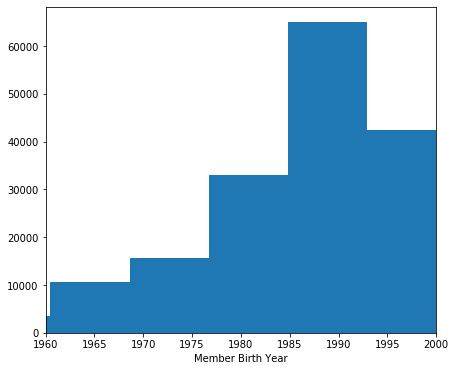

In [29]:
#histogram
binsize = 5
bins = np.arange(1930, bikes['member_birth_year'].max()+binsize, 2019)

plt.figure(figsize=[7, 6])
plt.hist(data = bikes, x = 'member_birth_year')
plt.xlim(1960, 2000)
plt.xlabel('Member Birth Year')
plt.show();

It seems that the highest numbers of riders were born between 1985 to 1995.  I will investigate ride duration next.

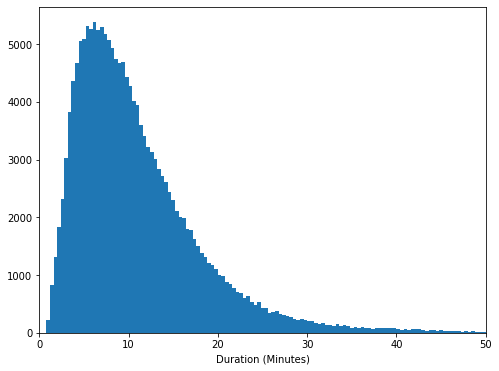

In [30]:
# plotting duration in minutes on a standard scale
binsize = 0.4
bins = np.arange(0, bikes['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = bikes, x = 'duration_min', bins = bins)
plt.xlim([0, 50])
plt.xlabel('Duration (Minutes)')
plt.show()

Lfyt renters mostly rode between one to ten minutes as this is the most popular timeframe.  But there is also a good amount that rode for 10-20 minutes.  I'm going to research gender next.

In [31]:
bikes['member_gender'].value_counts().sum()

170936

In [32]:
bikes['member_gender'].value_counts()

Male      128462
Female     39875
Other       2599
Name: member_gender, dtype: int64

In [33]:
prop_female=39875/170936
prop_male=128462/170936
prop_other=2599/170936
print(prop_female)
print(prop_male)
print(prop_other)

0.23327444189638227
0.7515210371133055
0.015204520990312163


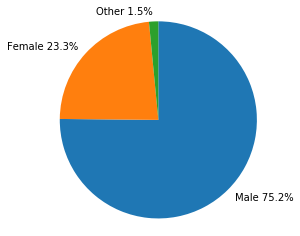

In [34]:
#Pie chart of gender
props=['Male 75.2%', 'Female 23.3%', 'Other 1.5%']
sorted_counts=bikes['member_gender'].value_counts()
plt.pie(sorted_counts, labels=props, startangle=90, counterclock=False)
plt.axis('square');

This is a male dominated bike rental program at 75.2% with females at 23.3% of use of other at 1.5%.

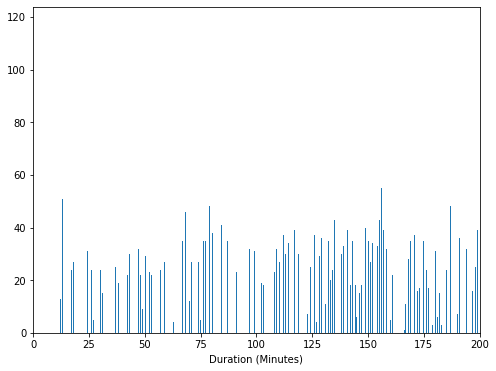

In [35]:
# plotting duration in minutes on a standard scale
binsize = 0.4
bins = np.arange(0, bikes['bike_id'].max()+binsize, binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = bikes, x = 'bike_id', bins = bins)
plt.xlim([0, 200])
plt.xlabel('Duration (Minutes)')
plt.show()

This is hard to interpret because I don't know if if lower bike ids could be a newer model bike.  Or maybe a certain ID range is placed in specific area stations.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

It was interesting to see a very steep curve on the ride duration histogram.  I figured most of the rides wouldn't be that long but there is a gradual drop off in time after 10, 15, and 20 minutes.  It did not surprise me that a majority of the riders were born between 1985 and 1995.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

 - I changed duration in seconds to minutes.  I did this by changing the start time and end time columns to datetime and then using the different to convert into minutes.  I also did it this way to make sure the duration in seconds column was accurate.  It was so then I could delete the duration in seconds column.
 - I deleted any rows with birthdays before 1919.  I don't think many people over 100 are renting bicycles so these users mostly likely have invalid birthdates in the company system.

<a id='bivariate'></a>
## Bivariate Exploration

I'm going to continue to look at member birth year, ride duration, and member gender.  There are some other variables too that might have an interesting relationship with others.

In [36]:
numeric_vars = ['duration_min', 'member_birth_year', 'bike_id', 'start_station_id']
cat_vars = ['member_gender', 'user_type', 'start_station_name']

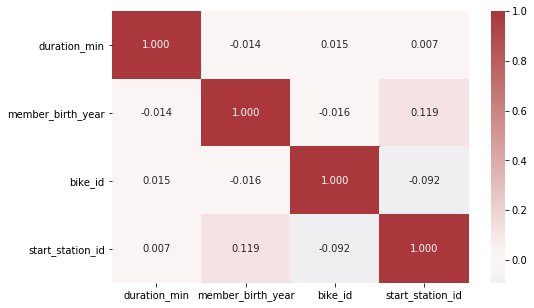

In [37]:
#plot matrix: Sample 200 rentals

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(bikes[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag', center = 0)
plt.show()

The station ID number has a slightly positive effect on the member birth year.  It could be that the rental locations are in an area where younger renters live.

C:\Users\emily\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\emily\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\emily\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


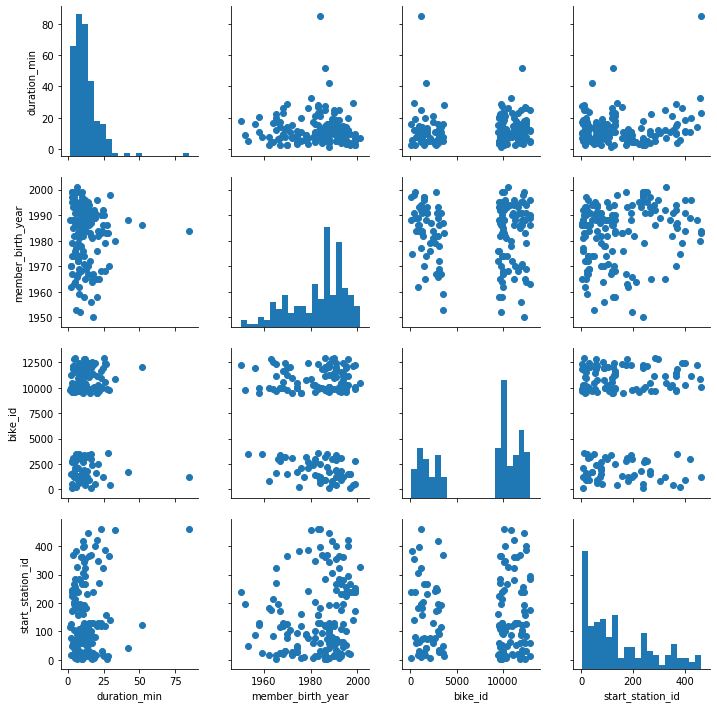

In [38]:
#I'm going to sample 200 for faster plotting
sample=np.random.choice(bikes.shape[0], 200, replace=False)
bikes_samp=bikes.loc[sample]

g = sb.PairGrid(data = bikes_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

It looks like younger riders ride longer than older members.  I will compare these two next.  It also looks like the lower station ids get more rentals than the higher ones.  

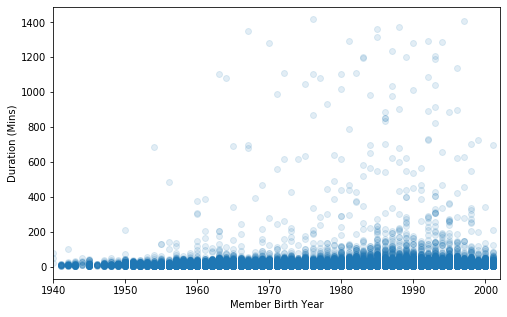

In [39]:
# scatter plot of member birth year vs. duration
plt.figure(figsize = [8, 5])
plt.scatter(data = bikes, x = 'member_birth_year', y = 'duration_min', alpha = 1/8)
plt.xlim([1940, 2002])
plt.xlabel('Member Birth Year')
plt.ylabel('Duration (Mins)')
plt.show()

This again cofirms the most users were born between 1985 and 1995.  There are quite a few outliers but they are spread out from 1970-2000.

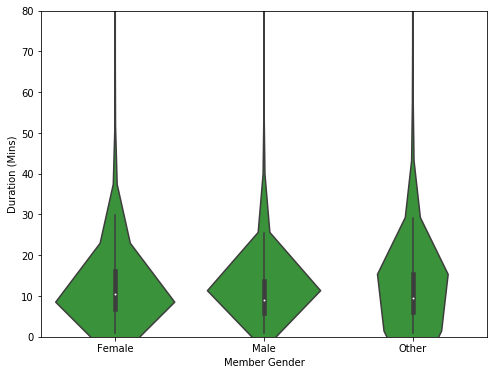

In [40]:
# errorbar plot of member gender vs. duration
base_color=sb.color_palette()[2]
plt.figure(figsize = [8, 6])
sb.violinplot(data = bikes, x = 'member_gender', y = 'duration_min', color=base_color)
plt.ylim([0, 80])
plt.xlabel('Member Gender')
plt.ylabel('Duration (Mins)')
plt.show();

Females average about a 9 minute ride, males 11 minutes, and other close to 15 minutes.  The male riding duration time seems evenly distributed compared to the other two.

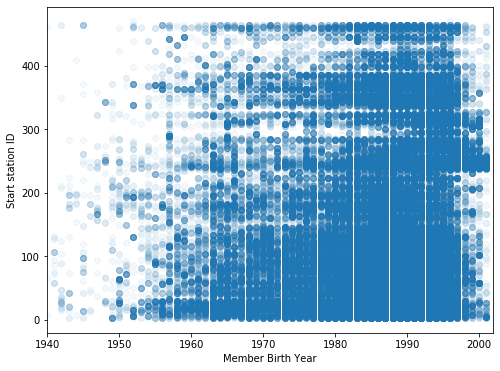

In [41]:
# scatter plot of member birth year vs. start_station_id
plt.figure(figsize = [8, 6])
plt.scatter(data = bikes, x = 'member_birth_year', y = 'start_station_id', alpha = 1/20)
plt.xlim([1940, 2002])
plt.xlabel('Member Birth Year')
plt.ylabel('Start station ID')
plt.show()

I would be really interested to find out station 300's location and any close to it.  My guess would be it's by a university or maybe a high school.  The same trend happens around station id 410.

In [42]:
bikes.query('start_station_id=="300"').head(2)

duration_sec              start_time                end_time  \
5187            534 2019-09-30 10:26:55.075 2019-09-30 10:35:49.754   
15610           679 2019-09-28 12:55:35.559 2019-09-28 13:06:55.426   

       start_station_id    start_station_name  start_station_latitude  \
5187                300  Palm St at Willow St               37.317298   
15610               300  Palm St at Willow St               37.317298   

       start_station_longitude  end_station_id           end_station_name  \
5187               -121.884995             317  San Salvador St at 9th St   
15610              -121.884995             312   San Jose Diridon Station   

       end_station_latitude  end_station_longitude  bike_id   user_type  \
5187              37.333955            -121.877349     2673  Subscriber   
15610             37.329732            -121.901782     2059  Subscriber   

       member_birth_year member_gender bike_share_for_all_trip  duration_min  
5187              1999.0          Male                      No      8.911317  
15610             1999.0          Male                      No     11.331117

This is station 300 and it is not that far from San Jose State University.
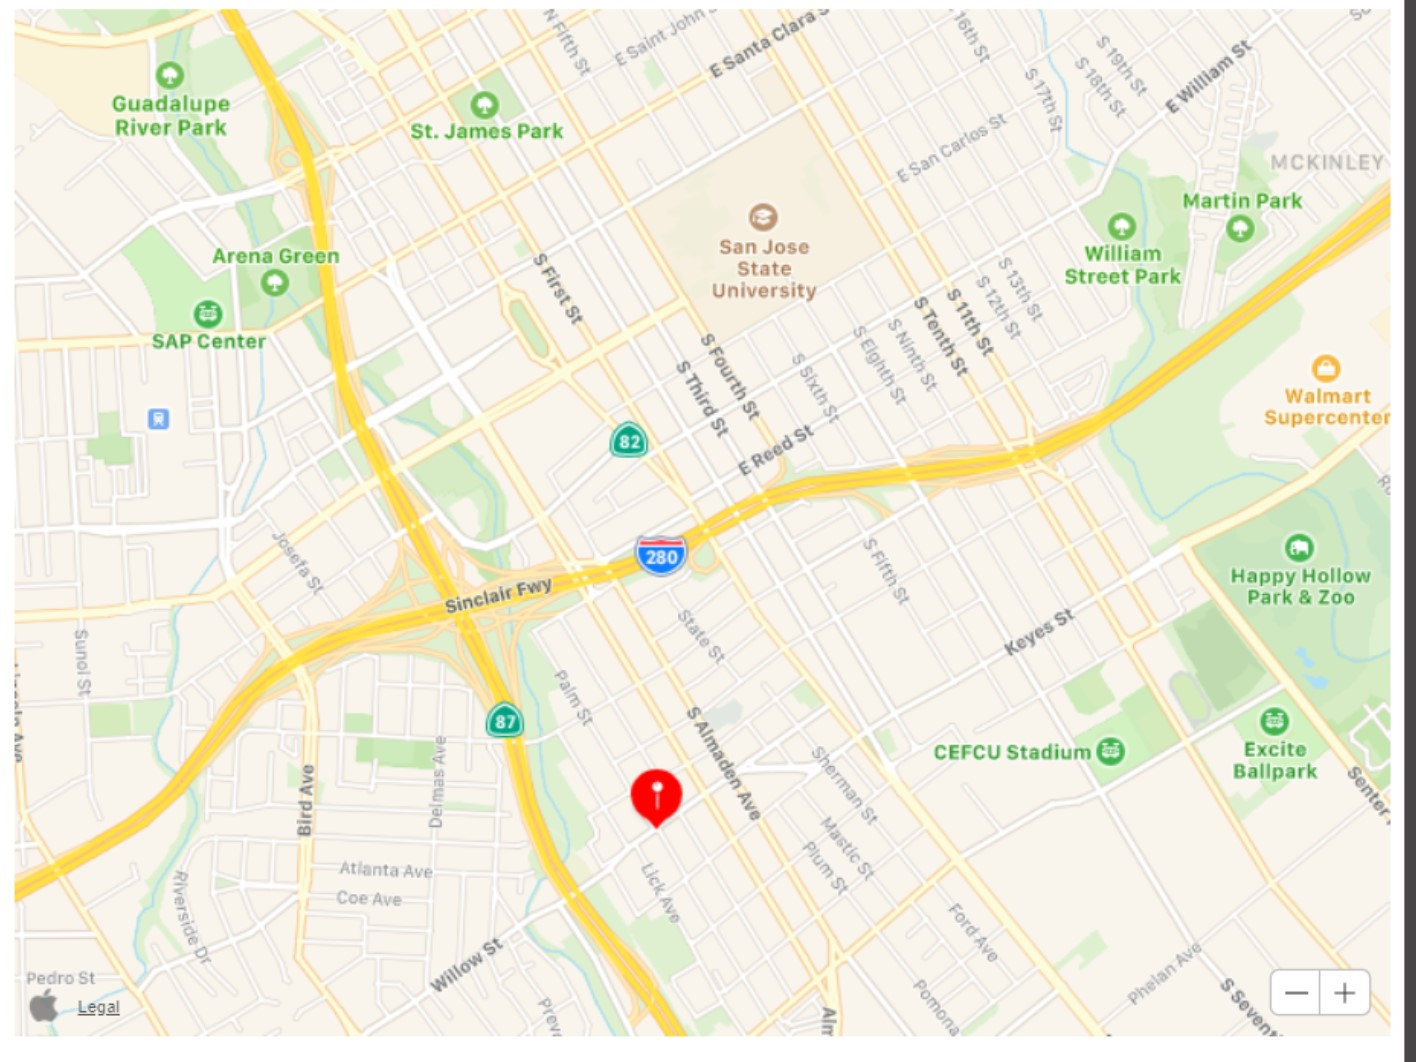

In [43]:
bikes.query('start_station_id=="410"').head(2)

duration_sec              start_time                end_time  \
1913          1491 2019-09-30 17:45:30.404 2019-09-30 18:10:21.515   
4497          1890 2019-09-30 12:31:23.637 2019-09-30 13:02:54.152   

      start_station_id              start_station_name  \
1913               410  Illinois St at Cesar Chavez St   
4497               410  Illinois St at Cesar Chavez St   

      start_station_latitude  start_station_longitude  end_station_id  \
1913                 37.7502              -122.386567             321   
4497                 37.7502              -122.386567               6   

                   end_station_name  end_station_latitude  \
1913               5th St at Folsom             37.780146   
4497  The Embarcadero at Sansome St             37.804770   

      end_station_longitude  bike_id   user_type  member_birth_year  \
1913            -122.403071    11320  Subscriber             1996.0   
4497            -122.403234    10032    Customer             1988.0   

     member_gender bike_share_for_all_trip  duration_min  
1913          Male                      No     24.851850  
4497          Male                      No     31.508583

And this one is station id 410 and not that far from City College of San Fransico-Evans Center.
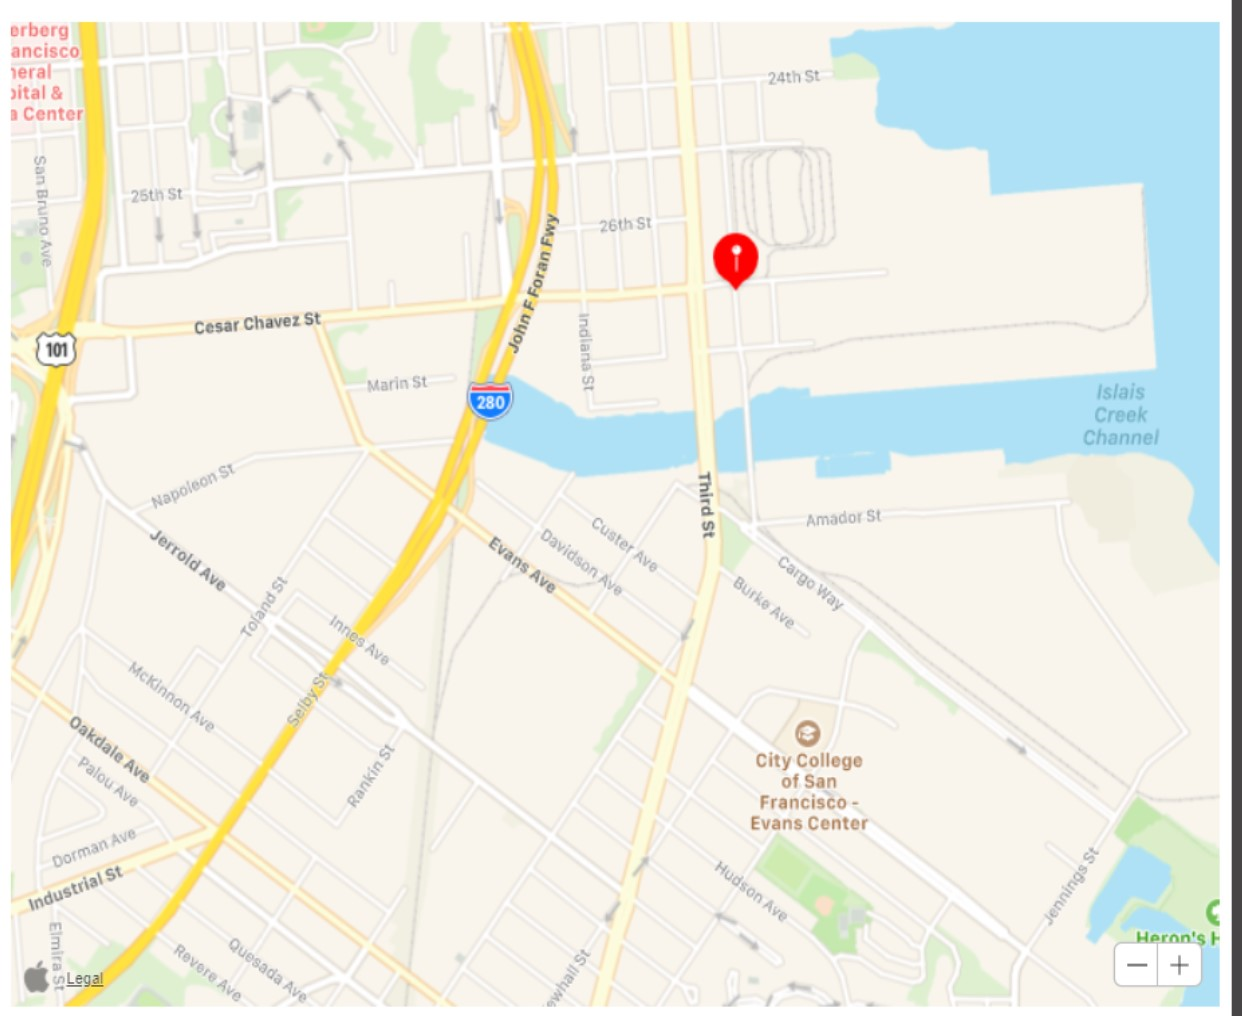

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The heat map showed that the station id relates with memeber birth year.  I wasn't really focusing on the station id ealier.  But this led me to dig into it more with a scatter plot.  Member birth year and ride duration were spot on with my predictions.  In general, the younger the age, the longer they ride.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, Station ids really showed that location matters when it comes to different ages of customers.  Take a look at the gps pictures above for two locations that had very young riders.  More research could be done in the future on neighborhoods and age demographics that could correspond with this data.

<a id='multivariate'></a>
## Multivariate Exploration

I want to measure member gender and/or user type with member birth date and duration.

In [44]:
# select ride duration of 20 minutes or less
bikes_dur=(bikes['duration_min']<=20)
bikesless20=bikes.loc[bikes_dur,:]

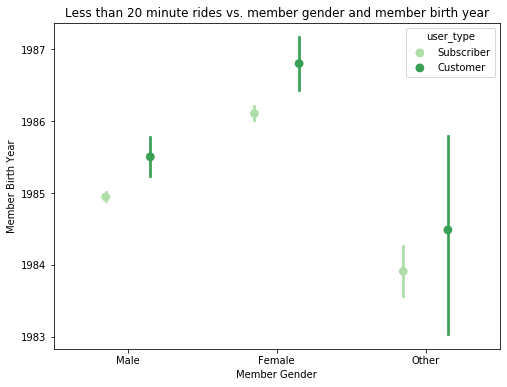

In [45]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bikesless20, x= 'member_gender', y = 'member_birth_year', hue = 'user_type',
           palette = 'Greens', linestyles = '', dodge = 0.3)
plt.title('Less than 20 minute rides vs. member gender and member birth year')
plt.xlabel('Member Gender')
plt.ylabel('Member Birth Year')
ax.set_yticklabels([],minor = True)
plt.show();

Female members are slightly older for those that ride 20 minutes or less compared to males.  Females also have a higher subscriber rate compared to males and other.

In [46]:
birth_yr=(bikes['member_birth_year']>=1985)
after85=bikes.loc[birth_yr,:]

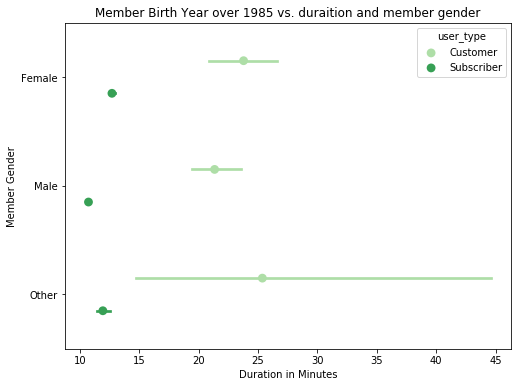

In [47]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = after85, x='duration_min', y = 'member_gender', hue = 'user_type',
           palette = 'Greens', linestyles = '', dodge = 0.3)
plt.title('Member Birth Year over 1985 vs. duraition and member gender')
plt.ylabel('Member Gender')
plt.xlabel('Duration in Minutes')
ax.set_yticklabels([],minor = True)
plt.show();

Males are least likely to sign up to be a customer or subscriber.  Females are most likely and others also sign up more than males.  Female customers ride 20 to 20 minutes compared to subscribers who ride for about 13 minutes. Male customers ride 20 to 24 minutes compared to subscribers who ride for about 10 minutes.  Others ride 15-45 minutes if they are a customer and a subscriber rides for 11 minutes.

In [48]:
yr_subset=bikes[bikes['member_birth_year']>=1985]
yr_subset.shape

(107407, 17)

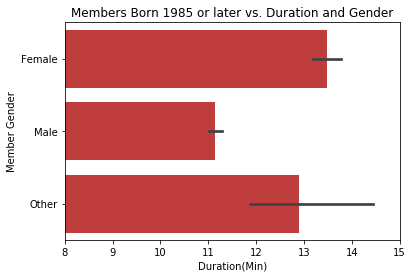

In [49]:
base_color=sb.color_palette()[3]
sb.barplot(data=yr_subset, x='duration_min', y='member_gender',
          color=base_color)
plt.title('Members Born 1985 or later vs. Duration and Gender')
plt.xlim(8, 15)
plt.ylabel('Member Gender')
plt.xlabel('Duration(Min)');

This chart narrows down average duration even better than the one previous.  Males rode on avg for 11 minutes, females for 13.5 minutes, and other for almost 13 minutes.  This is all for riders who are 34 years of age or younger.

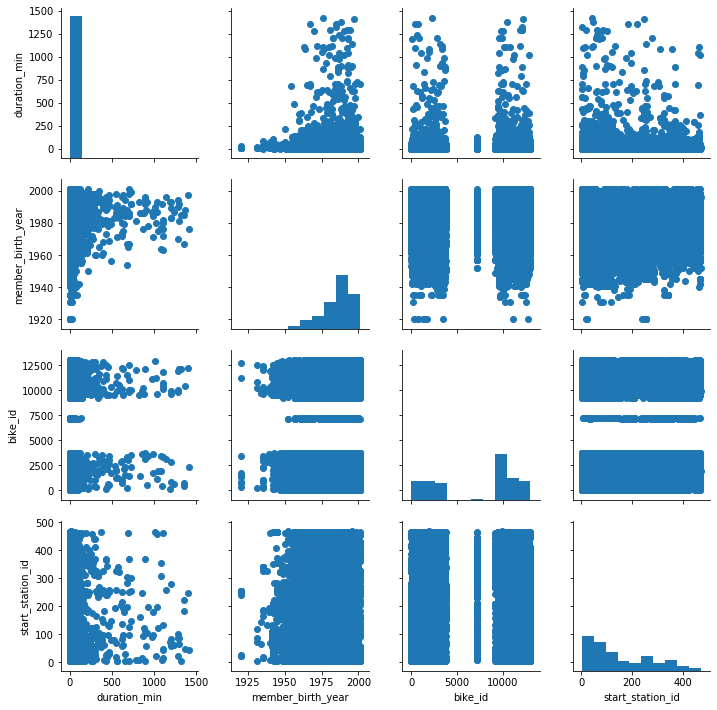

In [50]:
numeric_vars = ['duration_min', 'member_birth_year', 'bike_id', 'start_station_id']
cat_vars = ['member_gender', 'user_type', 'start_station_name']

g=sb.PairGrid(data=bikes, vars=numeric_vars);
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

<a id='conclusions'></a>
## Conclusions

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

My findings at the beginning showed that makes were 75% of the customer base.  Even though females are 23% of the customer base, they averaged riding 2.5 more minutes than males.  Females are also more loyal customers as they have more customers and subscribers when compared to men.  I narrowed in on those born after 1985 as that seemed to be the biggest users of Lyft bikes.  Males rode on avg for 11 minutes, females for 13.5 minutes, and other for almost 13 minutes.  

### Were there any interesting or surprising interactions between features?
I really liked scatter plot comparing member birth year and start station id.  I could have kept researching many more station ids just from that one plot.  The Lyft company could use the data to target different age customers in specific areas.  It's obvious that college students use their bikes frequently, but they could focus their marketing efforts on the slightly older age groups.